Homework 4 - Heather Turcios

# Exercise 5.1

In [1]:
#Import packages that are needed
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
#Setting plotting style
sns.set_style("white")
sns.set(font_scale=1.5)

In [3]:
#Read the given file
fp = "data/Justice_Equity_Need_Index.geojson"
data = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


In [4]:
#Check the coordinate system from the file
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
#Checking data column names
data.head()

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [6]:
#Checking data types
data.dtypes

OBJECTID              int64
zip                  object
jenicategory         object
jenipctl            float64
jenirank              int64
riskcategory         object
riskpctl            float64
driverscategory      object
driverspctl         float64
systemcategory       object
systempctl          float64
neighborhood         object
sup_dist             object
spa                  object
csa                  object
SHAPE_Length        float64
SHAPE_Area          float64
geometry           geometry
dtype: object

In [7]:
#Make a copy of the dataframe
orig = data.copy()

In [8]:
#Import package
%matplotlib inline
import matplotlib.pyplot as plt

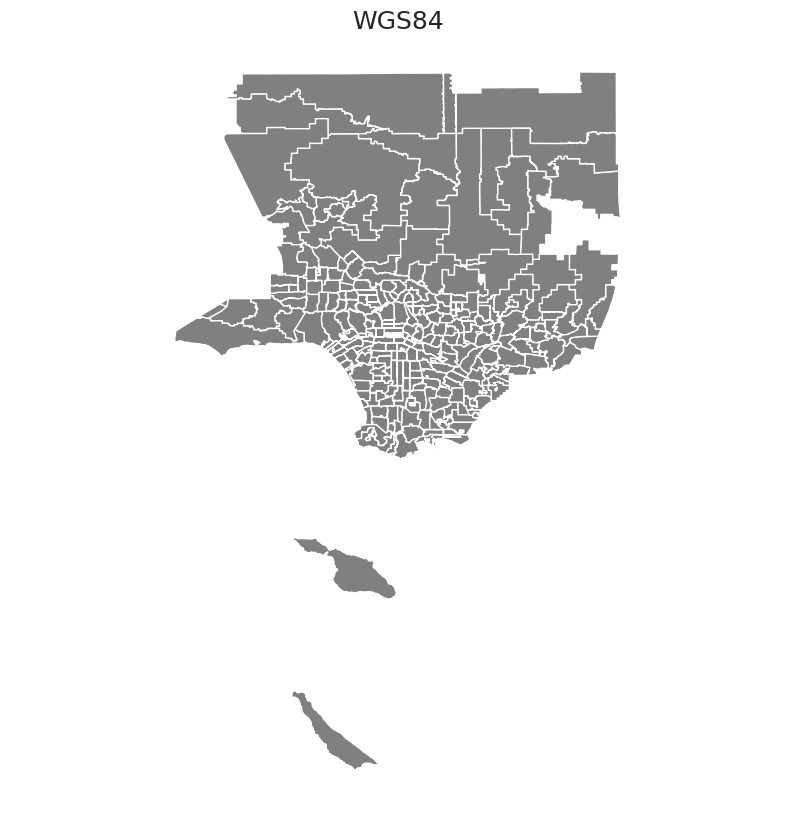

In [9]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))

#Plot the country borders
data.plot(ax=ax, facecolor='grey');

#Add title
ax.set_title("WGS84");

#Turn off the axis  
plt.axis('equal')
ax.set_axis_off()

In [10]:
#Dissolving the districts into groups
district_num = data[['sup_dist', 'geometry']]
district_groups = district_num.dissolve(by='sup_dist')

#View the dataframe
district_groups

,geometry
sup_dist,
District 1,"MULTIPOLYGON (((-118.18311 33.99633, -118.1833..."
District 2,"POLYGON ((-118.37791 33.85345, -118.37791 33.8..."
District 3,"POLYGON ((-118.52451 34.03052, -118.52502 34.0..."
District 4,"MULTIPOLYGON (((-118.17124 33.76274, -118.1725..."
District 5,"POLYGON ((-118.31103 34.10656, -118.31103 34.1..."


In [11]:
#Resetting index
district_groups.reset_index()

,sup_dist,geometry
0,District 1,"MULTIPOLYGON (((-118.18311 33.99633, -118.1833..."
1,District 2,"POLYGON ((-118.37791 33.85345, -118.37791 33.8..."
2,District 3,"POLYGON ((-118.52451 34.03052, -118.52502 34.0..."
3,District 4,"MULTIPOLYGON (((-118.17124 33.76274, -118.1725..."
4,District 5,"POLYGON ((-118.31103 34.10656, -118.31103 34.1..."


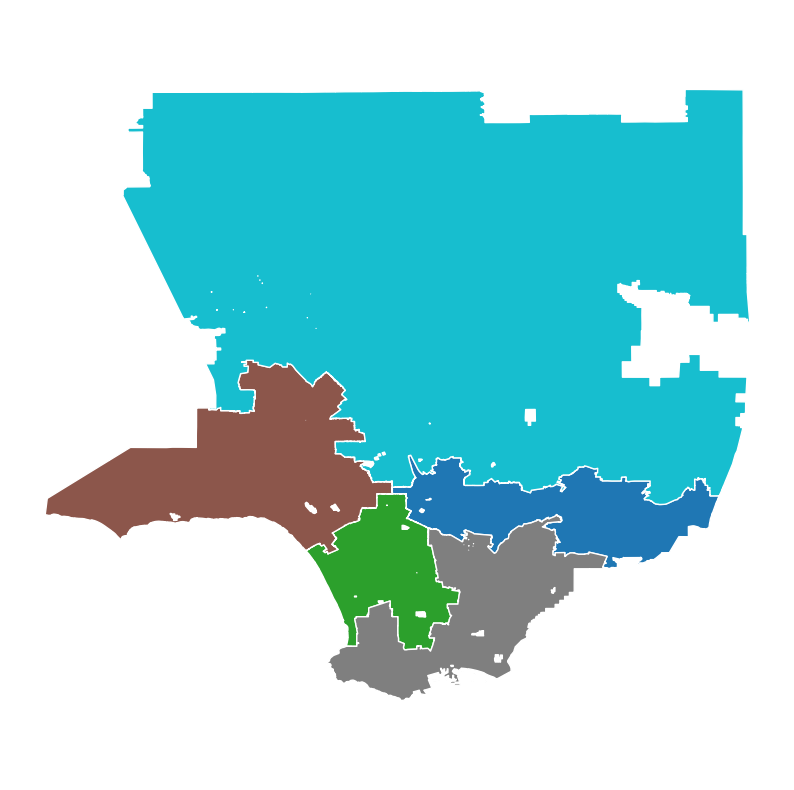

In [12]:
#Plot the data
fig, ax = plt.subplots(figsize=(10, 10))
district_groups.reset_index().plot(column='sup_dist',
                            ax=ax)
ax.set_axis_off()
plt.axis('equal')
plt.show() 

In [13]:
#Select the columns that you wish to retain in the data
district_grouping = data[['jenipctl', 'sup_dist', 'SHAPE_Length', 'SHAPE_Area', 'geometry']]

#Then summarize the quantative columns by mean
jenipctl_agg = district_grouping.dissolve(by='sup_dist', aggfunc='mean')
jenipctl_agg

,geometry,jenipctl,SHAPE_Length,SHAPE_Area
sup_dist,,,,
District 1,"MULTIPOLYGON (((-118.18311 33.99633, -118.1833...",60.502222,0.225481,0.001370
District 2,"POLYGON ((-118.37791 33.85345, -118.37791 33.8...",65.157143,0.172835,0.000868
District 3,"POLYGON ((-118.52451 34.03052, -118.52502 34.0...",38.586667,0.216787,0.001795
District 4,"MULTIPOLYGON (((-118.17124 33.76274, -118.1725...",51.292857,0.233778,0.001278
District 5,"POLYGON ((-118.31103 34.10656, -118.31103 34.1...",41.464286,0.524372,0.009303


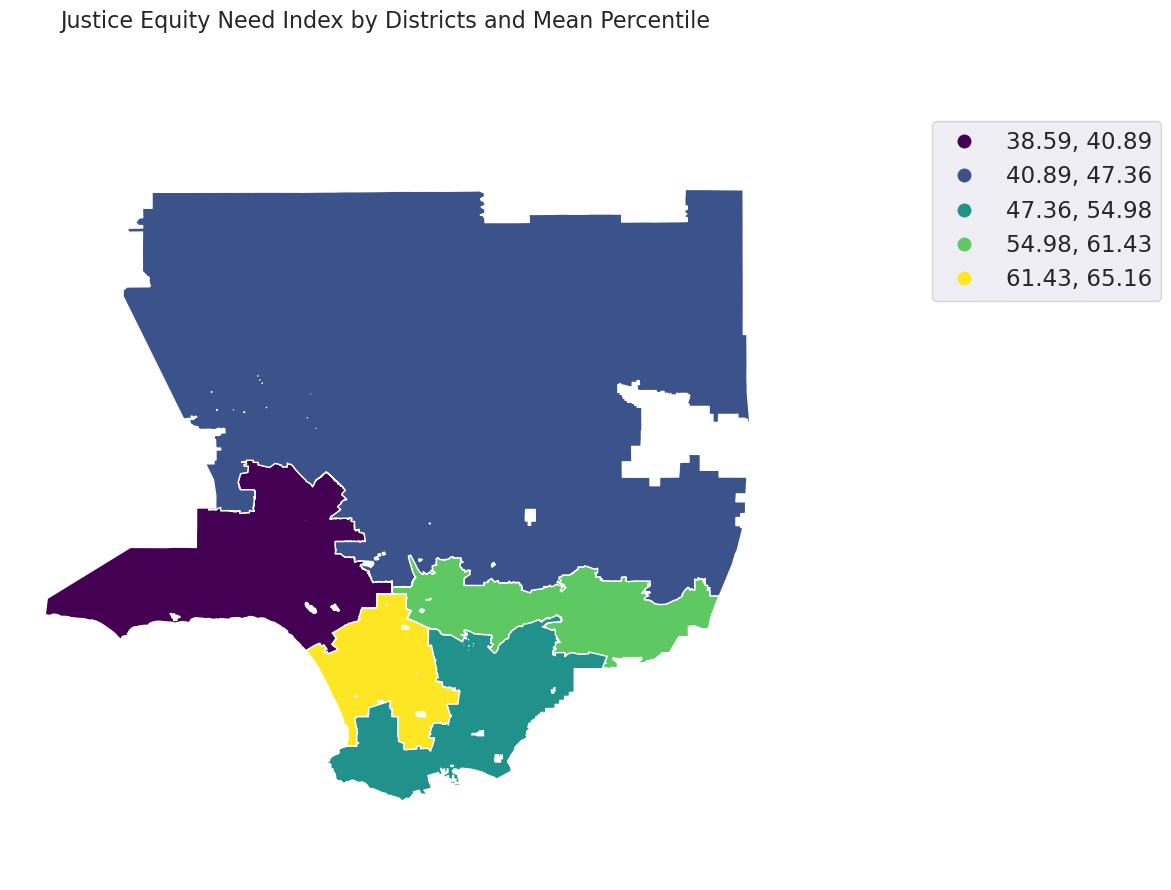

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
jenipctl_agg.plot(column='jenipctl',
                 legend=True,
                 scheme="quantiles",
                 ax=ax)

plt.suptitle('Justice Equity Need Index by Districts and Mean Percentile', fontsize=16)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.5,1))

ax.set_axis_off()
plt.axis('equal')
plt.show()

This map displays 5 districts in Los Angeles County. Based on the Justice Equity Need Index, this map also displays the mean perctile of each district. The percentiles provide information on the communities in those areas and where they fall per the total population. For example, the yellow district falls around the 60th percentile, meaning on 40% of the other districts fall above this district on the Justice Equity Need Index.

# Exercise 5.2

In [15]:
#Define base path
base_path = os.path.join("data")

#Define file paths
city_boundary_path = os.path.join(base_path, "LB_City_Boundary.geojson")

neighborhood_boundary_path = os.path.join(base_path, "LB_Neighborhoods.geojson")

jeni_path = os.path.join(base_path, "Justice_Equity_Need_Index.geojson")

#Import the data
city_boundary_LB = gpd.read_file(city_boundary_path)
neighborhood_boundary_LB = gpd.read_file(neighborhood_boundary_path)
data = gpd.read_file(jeni_path)

In [16]:
city_boundary_LB.head()

,OBJECTID,CITYNAME,CITYCODE,SHAPE_Length,SHAPE_Area,geometry
0,1,LONG BEACH,CLB,1.232684,0.01338,"MULTIPOLYGON (((-118.18175 33.88555, -118.1817..."


In [17]:
neighborhood_boundary_LB.head()

,OBJECTID,NEIGHBOR_NAME,GlobalID,created_user,created_date,last_edited_user,last_edited_date,SHAPE_Length,SHAPE_Area,geometry
0,1,East Village,{F64F07BE-5FA5-410D-88C1-B66CA53D38DF},None,NaT,None,NaT,0.033715,0.000069,"MULTIPOLYGON (((-118.18702 33.77534, -118.1863..."
1,2,Bluff Heights,{99E88FB4-E7F9-4AC3-B341-AB8E56AE9A31},None,NaT,None,NaT,0.041252,0.000067,"MULTIPOLYGON (((-118.15569 33.77171, -118.1545..."
2,3,Stoney Brook,{09F3E3ED-8CA1-41C5-AD87-1B1E2EEA7231},None,NaT,None,NaT,0.012744,0.000009,"MULTIPOLYGON (((-118.12099 33.77406, -118.1197..."
3,4,Bluff Park,{B817207F-7E13-47F8-BF14-41EB6EEC6AD8},None,NaT,None,NaT,0.041761,0.000066,"MULTIPOLYGON (((-118.15353 33.76444, -118.1524..."
4,5,CSULB,{34BB6FE3-315A-4B47-8578-DF606C9FDFA0},None,NaT,None,NaT,0.059820,0.000176,"MULTIPOLYGON (((-118.10798 33.78870, -118.1079..."


In [18]:
data.head()

,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [19]:
#Checking to see if all data is same CRS
print("city_boundary_LB", city_boundary_LB.crs)
print("neighborhood_boundary_LB", neighborhood_boundary_LB.crs)
print("JENI", data.crs)

city_boundary_LB epsg:4326
neighborhood_boundary_LB epsg:4326
JENI epsg:4326


In [20]:
jeni_pctl = data[['jenipctl', 'neighborhood', 'sup_dist', 'geometry', 'SHAPE_Length', 'SHAPE_Area']]
jeni_pctl

,jenipctl,neighborhood,sup_dist,geometry,SHAPE_Length,SHAPE_Area
0,0.000000,San Marino,District 5,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084...",0.177419,0.000962
1,0.400000,La Habra Heights,District 4,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427...",0.234952,0.001614
2,0.700000,Palos Verdes Estates,District 4,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905...",0.563332,0.003029
3,1.100000,Westlake Village,District 3,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995...",0.197748,0.001336
4,1.400000,Rancho Palos Verdes,District 4,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931...",0.624171,0.003365
...,...,...,...,...,...,...
276,98.599998,Vermont Square,District 2,"MULTIPOLYGON (((-118.28882 34.01835, -118.2878...",0.145093,0.000738
277,98.900002,Willowbrook,District 2,"MULTIPOLYGON (((-118.27330 33.93924, -118.2733...",0.155887,0.000694
278,99.300003,Willowbrook,District 2,"MULTIPOLYGON (((-118.26514 33.91157, -118.2645...",0.199342,0.000844
279,99.599998,Downtown,District 1,"MULTIPOLYGON (((-118.25468 34.04862, -118.2544...",0.045286,0.000072


In [21]:
#Clip the data to boundary of Long Beach
city_clip = gpd.clip(jeni_pctl, city_boundary_LB)

#View the first 6 rows and a few select columns
city_clip.head()

/opt/tljh/user/lib/python3.9/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


,jenipctl,neighborhood,sup_dist,geometry,SHAPE_Length,SHAPE_Area
99,35.500000,Long Beach,District 4,"POLYGON ((-118.11220 33.77536, -118.11173 33.7...",0.212855,0.001239
92,33.300000,Long Beach,District 4,"POLYGON ((-118.13370 33.81059, -118.13325 33.8...",0.269965,0.001763
85,30.800000,Long Beach,District 4,"POLYGON ((-118.12511 33.84634, -118.12511 33.8...",0.231759,0.001708
149,52.900002,Hawaiian Gardens,District 4,"MULTIPOLYGON (((-118.06471 33.82403, -118.0657...",0.078456,0.000241
71,25.700001,Lakewood,District 4,"POLYGON ((-118.09419 33.83188, -118.09493 33.8...",0.142398,0.000881


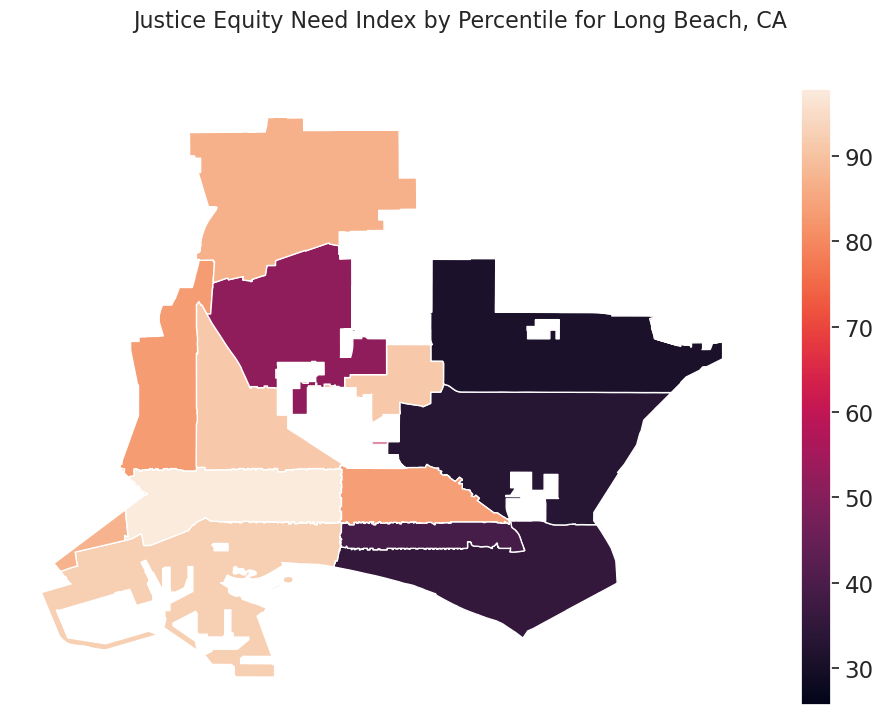

In [22]:
#Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

#Long Beach Boundary
#city_boundary_LB.plot(alpha=1,
                         #color="white",
                         #edgecolor="black",
                         #ax=ax)

#neighborhood_boundary_LB.plot(cmap='Reds',
                       #ax=ax,
                       #alpha=.5)

city_clip.plot(ax=ax,
                 column='jenipctl',
                 legend=True)

plt.suptitle('Justice Equity Need Index by Percentile for Long Beach, CA', fontsize=16)

ax.set_axis_off()
plt.axis('equal')

plt.show()

Looking at the map, I know Long Beach borders some wealthier communities on the eastern side like Huntington Beach. That is why it makes sense that the eastern neighboorhoods are in a lower need percentile than the western side. The communities on the western and northern sides are very high need on the JENI scale. With the upper left corner near Compton, it makes sense that these areas are in the higher percentiles.

# Exercise 5.3

In [127]:
#Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

In [128]:
#Select the zip and csa data from the JENI
zip_csa_data = data[['zip', 'csa', 'geometry']]
zip_csa_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [129]:
#Reproject to new projection
zip_csa = zip_csa_data.to_crs(epsg=3857)
zip_csa.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [170]:
#Create the point representing LMU
LMU_lon = 33.9710
LMU_lat = -118.4170

#Create GeoDataFrame
LMU_point = gpd.GeoDataFrame([[Point(LMU_lon, LMU_lat)]], geometry='geometry', crs={'init': 'epsg:3857'}, columns=['geometry'])
LMU_point

/opt/tljh/user/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,geometry
0,POINT (33.971 -118.417)


In [171]:
#Check to ensure CRS is correct
LMU_point.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [172]:
#Creating a centroid column for the dataset
zip_csa['centroid'] = zip_csa.centroid
zip_csa.head()

,zip,csa,geometry,centroid
0,91108,City of San Marino,"MULTIPOLYGON (((-13147794.179 4047256.800, -13...",POINT (-13148349.834 4045245.070)
1,90631,City of La Habra Heights,"MULTIPOLYGON (((-13129326.139 4025429.029, -13...",POINT (-13130220.945 4023406.404)
2,90274,City of Rancho Palos Verdes,"MULTIPOLYGON (((-13179177.697 4002548.915, -13...",POINT (-13176716.971 3998944.034)
3,91361,City of Westlake Village,"MULTIPOLYGON (((-13224787.024 4048688.878, -13...",POINT (-13228375.469 4046330.223)
4,90275,City of Rancho Palos Verdes,"MULTIPOLYGON (((-13179462.784 3993751.501, -13...",POINT (-13176234.604 3996054.498)


In [173]:
#Calculating distances for each zip code to LMU
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    #Calculate the distances
    dist = row[src_col].distance(dest_geom)

    #Convert into kilometers
    dist_km = dist / 1000

    #Assign the distance to the original data
    row[target_col] = dist_km
    return row

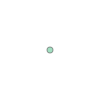

In [177]:
#Retrieve the geometry from data frame
#new_data = zip_csa.loc[0, 'centroid']
#LMU = zip_csa[['geometry']]

#Retrieve the geometry from LMU GeoDataFrame
LMU_geom = LMU_point.loc[0, 'geometry']
LMU_geom

In [182]:
#Calculate the distances using our function 'calculate_distance'
zip_csa_dis = zip_csa.apply(calculate_distance, dest_geom=LMU_geom, src_col='centroid', target_col='dist_to_LMU', axis=1)
zip_csa_dis

,zip,csa,geometry,centroid,dist_to_LMU
0,91108,City of San Marino,"MULTIPOLYGON (((-13147794.179 4047256.800, -13...",POINT (-13148349.833923832 4045245.069634103),13756.633397
1,90631,City of La Habra Heights,"MULTIPOLYGON (((-13129326.139 4025429.029, -13...",POINT (-13130220.944533523 4023406.403868277),13732.892854
2,90274,City of Rancho Palos Verdes,"MULTIPOLYGON (((-13179177.697 4002548.915, -13...",POINT (-13176716.97135462 3998944.034374197),13770.231149
3,91361,City of Westlake Village,"MULTIPOLYGON (((-13224787.024 4048688.878, -13...",POINT (-13228375.469475666 4046330.222516783),13833.458097
4,90275,City of Rancho Palos Verdes,"MULTIPOLYGON (((-13179462.784 3993751.501, -13...",POINT (-13176234.603574079 3996054.497534473),13768.930660
...,...,...,...,...,...
276,90037,Los Angeles - West Vernon,"MULTIPOLYGON (((-13167851.306 4031266.132, -13...",POINT (-13167698.496368404 4029215.5136193275),13770.428833
277,90061,Unincorporated - Athens Village,"MULTIPOLYGON (((-13166123.548 4020646.423, -13...",POINT (-13166201.577092076 4018109.8086692546),13765.751581
278,90059,Unincorporated - Willowbrook,"MULTIPOLYGON (((-13165214.954 4016934.360, -13...",POINT (-13163483.708356638 4018826.2554709367),13763.361289
279,90014,Los Angeles - Downtown,"MULTIPOLYGON (((-13164050.373 4035331.965, -13...",POINT (-13163728.574229969 4034579.712145005),13768.203708


In [180]:
#Calculate the maximum distance
max_dist = zip_csa_dis['dist_to_LMU'].max()
print("Maximum distance to LMU is %.0f km." % (max_dist))

Maximum distance to LMU is 13833 km.


In [189]:
#Finding the furthest location from LMU
zip_csa_dis.loc[zip_csa_dis['dist_to_LMU'] >= 13833]

,zip,csa,geometry,centroid,dist_to_LMU
3,91361,City of Westlake Village,"MULTIPOLYGON (((-13224787.024 4048688.878, -13...",POINT (-13228375.469475666 4046330.222516783),13833.458097


In [191]:
#Calculate the average distance
avg_dist = zip_csa_dis['dist_to_LMU'].mean()
print("Average distance to LMU is %.0f km." % (avg_dist))

Average distance to LMU is 13770 km.
